Introduction to regression with Neural Networks in Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])


y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

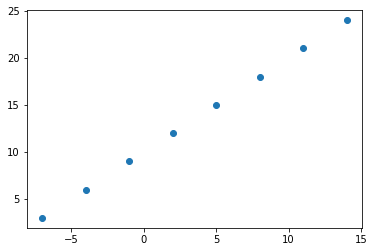

In [ ]:
plt.scatter(X,y)

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Modeling with Tensorflow

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 272ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123


In [ ]:
y_pred = model.predict(X)
y_pred

array([[-6.340421 ],
       [-3.5802407],
       [-0.8200602],
       [ 1.9401203],
       [ 4.7003007],
       [ 7.460481 ],
       [10.220662 ],
       [12.980843 ]], dtype=float32)

In [ ]:
model.predict([12])

array([[11.140722]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(50,activation=None),
      tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics = 'mae')

In [ ]:
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)
y_pred = model.predict(X)
y_pred

Epoch 1/100
1/1 [==============================] - 0s 349ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2603 - mae: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5659 - mae: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8675 - mae: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 8

array([[ 3.0280597],
       [ 5.953853 ],
       [ 8.879647 ],
       [11.805441 ],
       [14.731235 ],
       [17.657028 ],
       [20.58282  ],
       [23.508614 ]], dtype=float32)

In [ ]:
model.predict([17])

array([[26.434414]], dtype=float32)

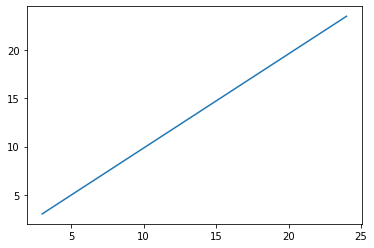

In [ ]:
plt.plot(y,y_pred)

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 50)                100       
                                                                 
 dense_45 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


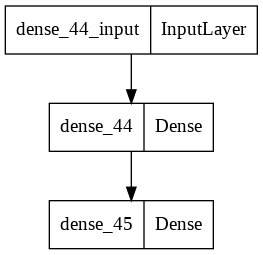

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

In [ ]:
model.evaluate(y,y_pred)

1/1 [==============================] - 0s 99ms/step - loss: 9.7526 - mae: 9.7526


[9.752646446228027, 9.752646446228027]

In [ ]:
y.shape, y_pred.shape

(TensorShape([8]), (8, 1))

In [ ]:
y_pred = tf.squeeze(y_pred)

In [ ]:
model.evaluate(y,y_pred)

1/1 [==============================] - 0s 99ms/step - loss: 9.7526 - mae: 9.7526


[9.752646446228027, 9.752646446228027]

In [ ]:
y.shape, y_pred.shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
mae = tf.metrics.mean_absolute_error(y,y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.23867765>

In [ ]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [ ]:
load_saved_model = tf.keras.models.load_model("model")

In [ ]:
load_saved_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 50)                100       
                                                                 
 dense_45 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 3.0280597,  5.953853 ,  8.879647 , 11.805441 , 14.731235 ,
        17.657028 , 20.58282  , 23.508614 ], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
def mae_f(y_pred, y_test):
  return tf.keras.metrics.mae(y_pred, y_test)

In [ ]:
mae1 = mae_f(y_pred,y)
mae1

<tf.Tensor: shape=(), dtype=float64, numpy=0.23867765069007874>

<tf.Tensor: shape=(8,), dtype=float64, numpy=
array([10.47895521,  8.28461015,  6.81017637,  6.04863977,  6.        ,
        6.66425705,  8.04141045, 10.13146019])>

In [ ]:
loaded_model_prediction = load_saved_model.predict(X)

In [ ]:
y_pred

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([ 3.0280597,  5.953853 ,  8.879647 , 11.805441 , 14.731235 ,
       17.657028 , 20.58282  , 23.508614 ], dtype=float32)>

In [ ]:
mae_1 = mae_f(loaded_model_prediction.squeeze(),y)
mae_1

<tf.Tensor: shape=(), dtype=float64, numpy=0.23867765069007874>

In [ ]:
loaded_model_prediction.squeeze() == y_pred

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>